<a href="https://colab.research.google.com/github/tommasomora01/StockIndexClassification/blob/main/StockIndexClassification_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import shutil
import os
directory = '/content/StockIndexClassification'

# Verifica se la directory esiste
if os.path.exists(directory):
    # Rimuovi la directory e il suo contenuto
    shutil.rmtree(directory)
    print(f'Directory "{directory}" rimossa.')
else:
    print(f'Directory "{directory}" non esiste.')
!git clone https://github.com/tommasomora01/StockIndexClassification.git
%run /content/StockIndexClassification/StockIndexClassification_COLABnew.ipynb

Directory "/content/StockIndexClassification" rimossa.
Cloning into 'StockIndexClassification'...
remote: Enumerating objects: 659, done.
remote: Counting objects: 100% (659/659), done.
remote: Compressing objects: 100% (487/487), done.
remote: Total 659 (delta 202), reused 596 (delta 166), pack-reused 0 (from 0)
Receiving objects: 100% (659/659), 10.85 MiB | 20.46 MiB/s, done.
Resolving deltas: 100% (202/202), done.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            SPX Index    VIX  MOVE Index  10Y-2Y %  OAS HY\n( vs GOV)  \
Data                                                                    
2001-01-02  1299.3655  29.99      113.93   0.00054           0.086520   
2001-01-03  1364.6333  26.60      112.96   0.00229           0.085028   
2001-01-04  1350.2664  26.97      114.51   0.00252           0.085185   
2001-01-05  1314.8405  28.67      117.05   0.00362           0.085383   
2001-01-08  

In [17]:
from google.colab import drive
import os
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/StockPrediction'
config_file_path = '/content/drive/MyDrive/StockPrediction/config.json'
folders = ['/content/drive/MyDrive/StockPrediction/models_saved', '/content/drive/MyDrive/StockPrediction/log_saved', '/content/drive/MyDrive/StockPrediction/log_model']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score

import pandas as pd

import matplotlib.pyplot as plt
from torch.nn.functional import mse_loss
from typing import (Tuple)
import numpy as np


In [19]:

dataset = pd.read_excel("/content/drive/MyDrive/StockPrediction/model_data.xlsx", sheet_name="DATA")

config = load_config(config_file_path)

dataset = dataset.set_index('Data')

cleared_dataset = dataset.dropna()


In [20]:
year_start = config['dataset_params']['year_start']
month_start = config['dataset_params']['month_start']
year_end = config['dataset_params']['year_end']
month_end = config['dataset_params']['month_end']

dataset_handler = DatasetHandler(normalized_df,year_start=year_start,month_start=month_start,year_end=year_end,month_end=month_end)
train_model_dataset , _ = dataset_handler.split_dataset()

In [21]:
train_inputs = train_model_dataset.iloc[:,:]
folders[0] = os.path.join(folders[0],"dataset_2019_2022")
folders[1] = os.path.join(folders[1],"dataset_2019_2022")
print(type(train_inputs))
print(train_inputs.shape)


X_train_tensor = torch.tensor(train_inputs.to_numpy())

print(type(X_train_tensor))

<class 'pandas.core.frame.DataFrame'>
(1174, 14)
<class 'torch.Tensor'>


In [22]:
sequence_length = config['dataset_params']['sequence_length']
offset = config['dataset_params']['offset']
distance_pred = config['dataset_params']['distance_pred']
output_size = config['model_params']['output_size']
learning_rate = config['model_params']['learning_rate']
num_epochs = config['model_params']['num_epochs']
batch_size = config['model_params']['batch_size']

folders[0] = os.path.join(folders[0],f"{distance_pred}gg")
folders[1] = os.path.join(folders[1],f"{distance_pred}gg")

Num DOWN = 304, 28.842504743833018% (inf = -0.1) ;Num NEUTRAL = 22, 2.0872865275142316%  ; Num UP = 728, 69.07020872865274% (sup = 0.7)


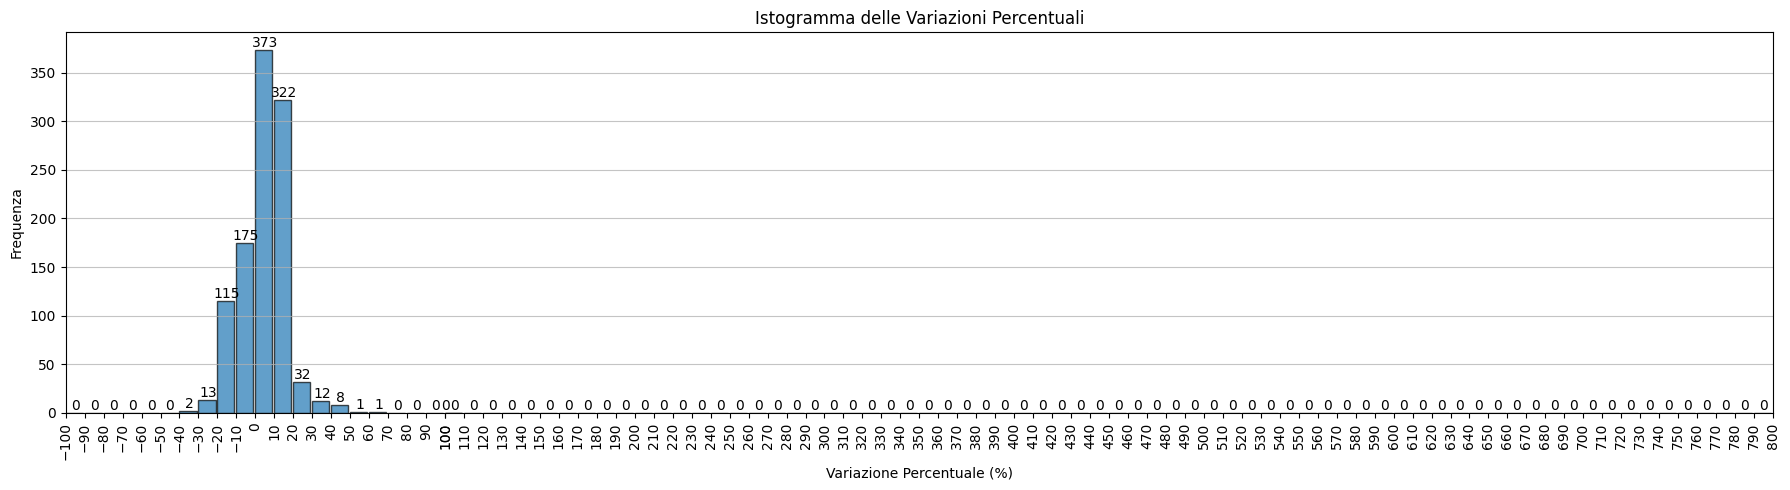

torch.Size([6, 30, 14])
torch.Size([6])
torch.Size([6, 30, 14])
torch.Size([6])


In [23]:
dataset = SequenceDataset(train_inputs, sequence_length=sequence_length, offset=offset,distance_pred=distance_pred)
dataset.show_sequence(plot_mode=True)
# Split train-test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
# Creazione dei DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
for inputs in train_loader:
  print(inputs[0].shape)
  print(inputs[1].shape)
  break
for inputs in test_loader:
    print(inputs[0].shape)
    print(inputs[1].shape)
    break

In [24]:
model_dim = config['model_params']['dimension']
d_model = config['model_params']['d_model']
n_head = config['model_params']['n_head']
dim_feedforward = config['model_params']['dim_feedforward']
num_layers = config['model_params']['num_layers']
kernel_size = config['model_params']['kernel_size']
early_stopping_patience = config['model_params']['early_stopping_patience']
early_stopping_delta = config['model_params']['early_stopping_delta']


In [15]:
print(os.path.join(folders[2],f"log_modelli_{model_dim}Model_datasetSmall_{distance_pred}gg.csv"))
log_model_path = os.path.join(folders[2],f"log_modelli_{model_dim}Model_datasetSmall_{distance_pred}gg.csv")
if os.path.exists(log_model_path):
    # Read the first row of the CSV to extract the model name
    log_df = pd.read_csv(log_model_path)
    model_file = log_df.iloc[0]['model_file']  # Assuming the column is named 'model_name'

    print(f"Model file extracted: {model_file}")

    d_model = log_df.iloc[0]['D_Model']
    n_head = log_df.iloc[0]['N_Head']
    dim_feedforward = log_df.iloc[0]['FF_Dim']
    num_layers = log_df.iloc[0]['Num_Layers']
    kernel_size = log_df.iloc[0]['Kernel_Size']
    # Construct the path to the model file
    model_file_path = os.path.join(folders[0], model_file)



/content/drive/MyDrive/StockPrediction/log_model/log_modelli_smallModel_datasetSmall_90gg.csv


In [25]:
# Creazione del modello
model = TimeSeriesModel(train_inputs.shape[-1], output_size,"small",d_model = d_model, n_head= n_head, dim_feedforward= dim_feedforward, num_layers=num_layers, kernel_size=kernel_size)
model.load_state_dict(torch.load(model_file_path))

for m in model.modules():
    if isinstance(m, (nn.Conv1d, nn.Conv2d, nn.Conv3d, nn.Linear)):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')  # For ReLU activation
    if isinstance(m, (nn.TransformerEncoderLayer)):
        nn.init.xavier_uniform_(m.linear1.weight)
        nn.init.xavier_uniform_(m.linear2.weight)

print(model)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


NameError: name 'model_file_path' is not defined

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# # Definizione della loss e dell'optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(delta=early_stopping_delta, patience=early_stopping_patience)

In [ ]:
# Valutazione del modello sul test set
test_accuracy, all_predictions, all_targets = evaluate_model(model, test_loader, device)
# #test_accuracy, all_predictions, all_targets = evaluate_model(model, test_loader, device)
print(f"Accuracy sul test set: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calcolare la matrice di confusione
cm = confusion_matrix(all_targets, all_predictions)

# Visualizzare la matrice di confusione
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Neutral', 'Up'], yticklabels=['Down', 'Neutral', 'Up'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Stampa la matrice di confusione
print("Matrice di Confusione:")
print(cm)